# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')

# copying data to another variable to avoid any changes to original data
df_backup = df.copy()

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns and looks consistent with the description provided in the Data Dictionary.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# shape of the DataFrame
df.shape

(1898, 9)

#### Observations:  
The dataset has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
* There are 5 numeric columns and 4 object columns
* There are 1898 non-null values in every column
* Memory usage is 133.6+ KB

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [6]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df.restaurant_name = df.restaurant_name.astype('category')
df.cuisine_type = df.cuisine_type.astype('category')
df.day_of_the_week = df.day_of_the_week.astype('category')

# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
* There are 5 numeric columns, 3 categorical columns, and 1 object column 
* The memory usage has changed from 133.6+ KB down to 102.7+ KB

In [7]:
# checking missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations
There are no missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# statistical summary of both numeric and categorical columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
* The $\textbf{minimum}$ food preparation time is $\textbf{20.00}$ minutes
* The $\textbf{average}$ food preparation time is $\textbf{27.37}$ minutes
* The $\textbf{maximum}$ food preparation time is $\textbf{35.00}$ minutes
* The median and maximum delivery times are 2 minutes less than that of the food preparation times, and the average delivery time is about 2 1/2 minutes less than the average food preparation time.
* The cost of the order looks right skewed, with the median close to the 1st quartile, and the mean is greater than the median.
* The top restaurant is Shake Shack, the top cuisine is American, Weekends are more popular than Weekdays, and the most common rating is 'Not given'

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# find the number of times each rating is used
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
736 orders are not rated

#### Numeric statistical summary of orders that are rated

In [10]:
# df_rated is a new dataframe that contains only the rows of data that have a rating
df_rated = df.loc[df['rating']!='Not given'] 

# convert the "object" rating column to a "numeric" rating column
df_rated.rating = df_rated.rating.astype('int32')

# show a statistical summary of the rating column
df_rated.rating.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
rating,1162.0,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0


### Observations
* Of the orders that are rated, the mean rating is 4.34
* Of the orders that are rated, the median rating is 5.0
* The rating distribution is left skewed

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [11]:
# function to create labeled barplots
def labeled_barplot(data, feature, hue=None, perc=False, n=None, r=90, count=None, barwidth=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    if count is None:
        count = data[feature].nunique()
    else:
        count = count
    if n is None:
        plt.figure(figsize=(count + 1, 5));
    else:
        plt.figure(figsize=(n + 1, n/3)); 

    plt.xticks(rotation=r, fontsize=15)
    if hue is None:
        ax = sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().index,
        );
    else:
        ax = sns.countplot(
            data=data,
            x=feature,
            hue=hue,
            palette="Paired",
            order=data[feature].value_counts().index,
        );
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        if barwidth != None:
            p.set_width(barwidth)
            #p.set_x(p.get_x() + diff * .5)

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
       

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        );  # annotate the percentage

    plt.show();  # show the plot

### Univariate Categorical

#### Observations on Cuisine type

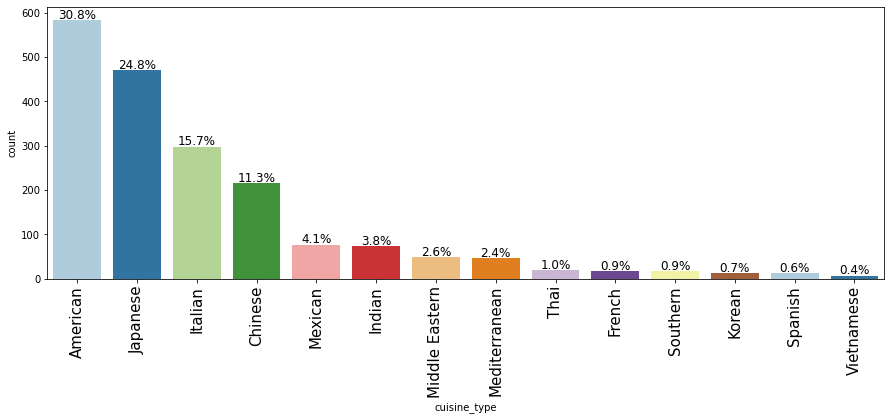

In [12]:
labeled_barplot(df, 'cuisine_type', perc=True);

##### Observations:
* American is the most commonly ordered cuisine type, followed by Japanese, and then Italian.
* Vietnamese is the least commonly ordered cuisine type.

#### Observations on rating

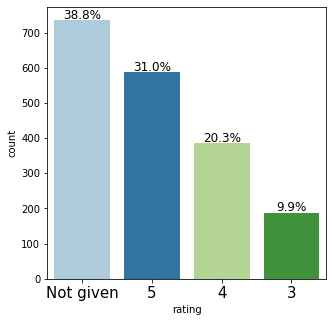

In [13]:
labeled_barplot(df, 'rating', perc=True, r=0);

#### Observations: 
Most ratings are 'not given'. Of the ratings that are given, 5 is the most common rating, then four, and 3 is the least common.

#### Observations on day of the week

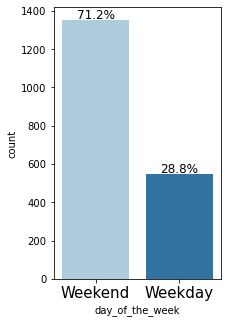

In [14]:
labeled_barplot(df, 'day_of_the_week', perc=True, r=0);

#### Observations
The number of orders are greater on the weekend days than the weekdays.

#### Observations on restaurant name

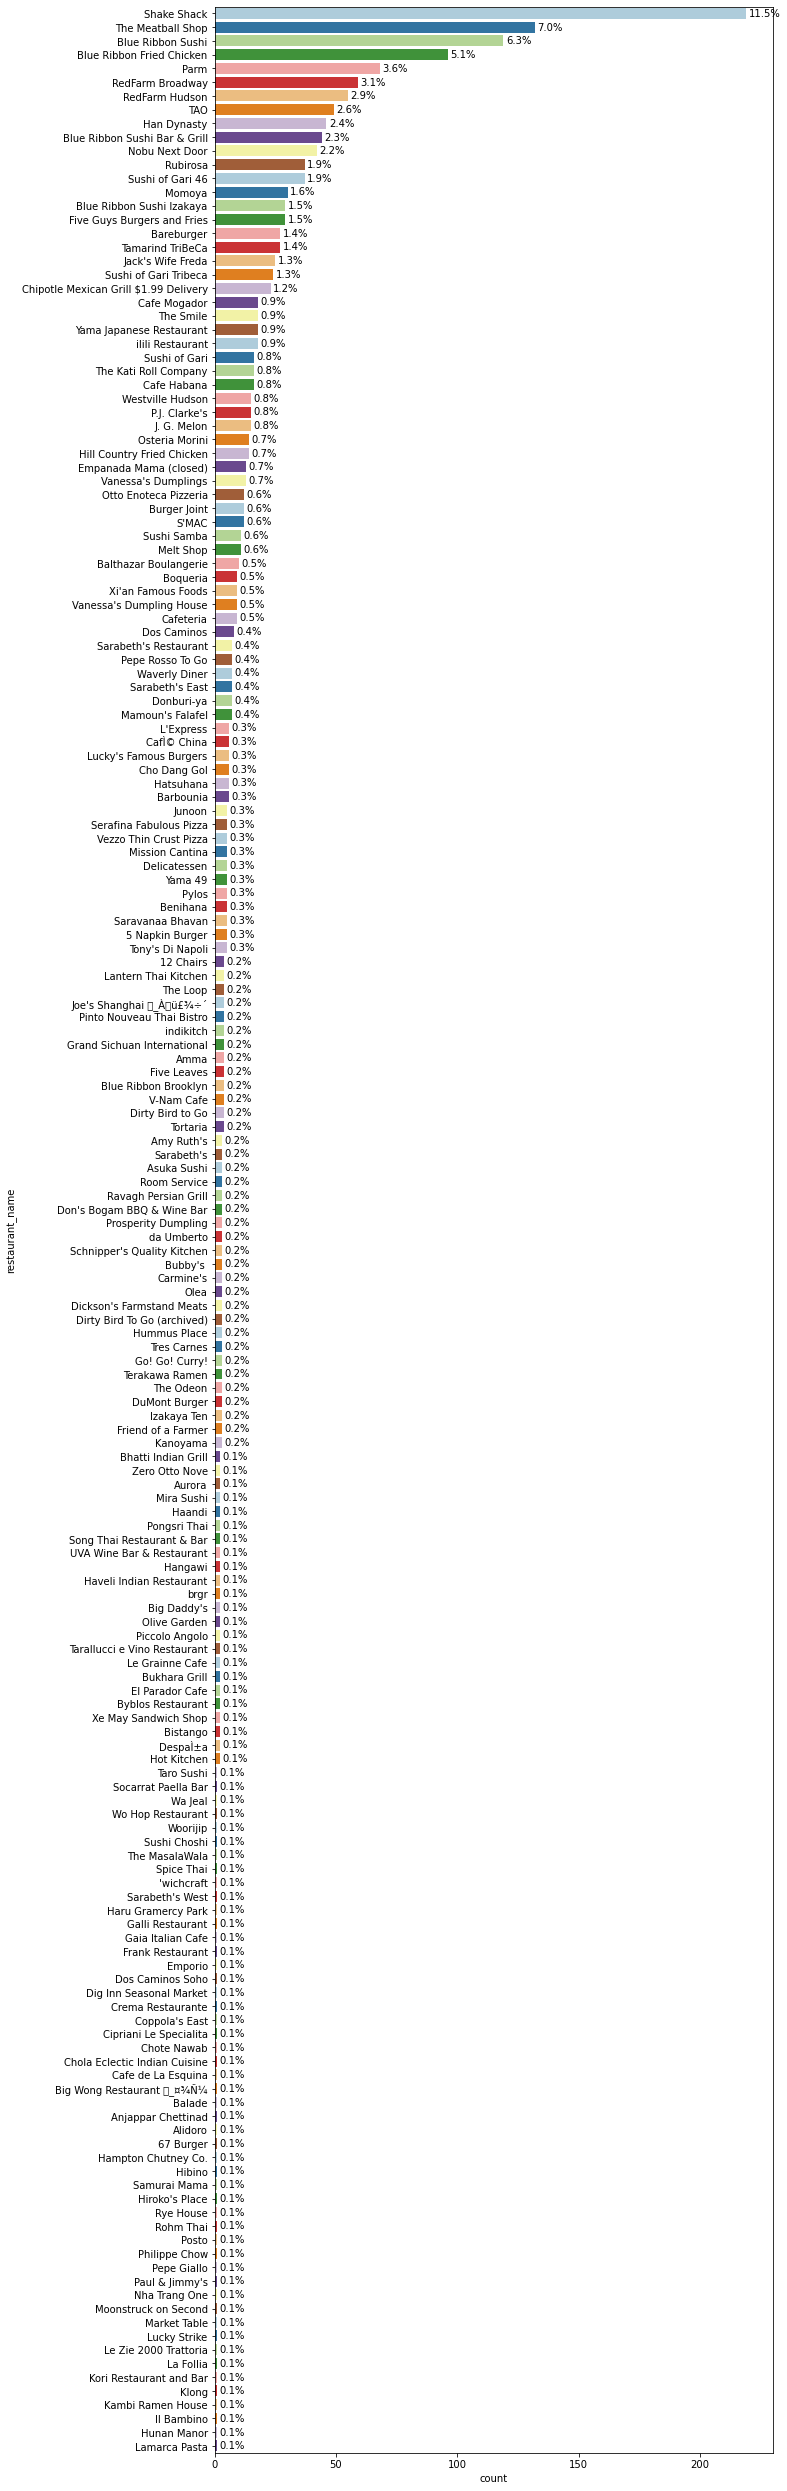

In [27]:
ax = sns.countplot(
        data=df,
        y='restaurant_name',
        palette="Paired",
        order=df['restaurant_name'].value_counts().index,
    );
for p in ax.patches:
    label = "{:.1f}%".format(100 * p.get_width() / len(df['restaurant_name'])) 
    # 0.6 is vertical offset, greater # means it text appears lower,
    # 1 is horizontal space to the right of the bar before text
    ax.text(p.get_width()+1, p.get_y()+0.6,label, fontsize=10)
plt.gcf().set_size_inches(10, 45)


#### Observations:
* Of the 178 restaurants, 1/3 (33.5%) of the total business comes from the top 5 restaurants
* The top 5 restaurants (in terms of number of orders) are:
    * 1. Shake Shack 
    * 2. The Meatball Shop 
    * 3. Blue Ribbon Sushi 
    * 4. Blue Ribbon Fried Chicken
    * 5. Parm

#### Observations of customers - new vs repeat

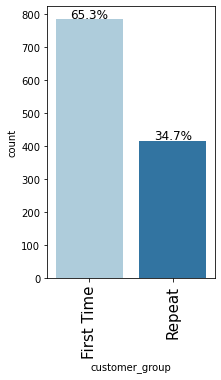

In [16]:
# create a new df that is grouped by customer_id, counts is the number of orders associated with each customer id
customer_df = df.groupby('customer_id').size().reset_index(name='counts')

# create a new column customer_group composed of 'First Time' customers and 'Repeat' customers
customer_df['customer_group']=pd.cut(customer_df.counts, 
                        bins=(0,1,13),labels=('First Time','Repeat'))

labeled_barplot(customer_df, 'customer_group', perc=True, r=90);

#### Observations:
There are more first time customers than repeat customers

### Univariate Numerical

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.    
    
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, binrange=None, binwidth=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, binrange=binrange, binwidth=binwidth, palette="winter"
    ) if binrange else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on cost of the order

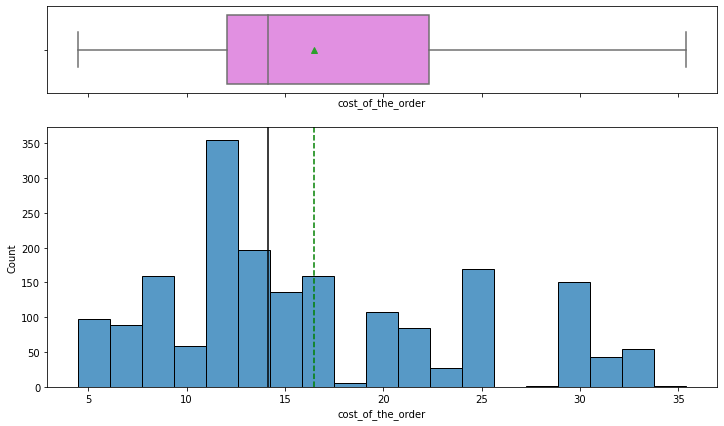

In [18]:
histogram_boxplot(df, 'cost_of_the_order')

#### Observations:
* The median cost of the order is \\$14.14
* The mean cost of the order is \\$16.50
* The cost of the order distribution is right skewed
* There are no outliers in the cost of the order distribution

#### Observations on food preparation time

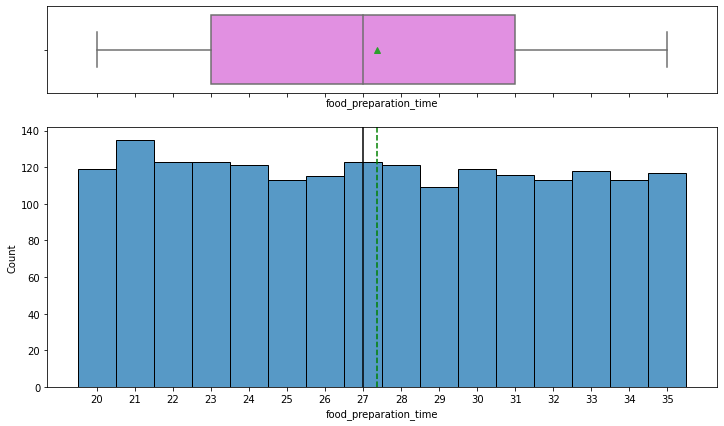

In [19]:
histogram_boxplot(df, 'food_preparation_time', binrange=[19.5,35.5], binwidth=1)
plt.xticks(np.arange(min(df.food_preparation_time), max(df.food_preparation_time)+1, 1));

#### Observations:
* The food preparation time has a uniform distribution ranging from 20 to 35 minutes.
* The median food preparation time is 27 minutes.
* The mean food preparation time is 27.37 minutes.
* The distribution is almost symmetric. 
* There are are no outliers in the distribution.

#### Observations on delivery time

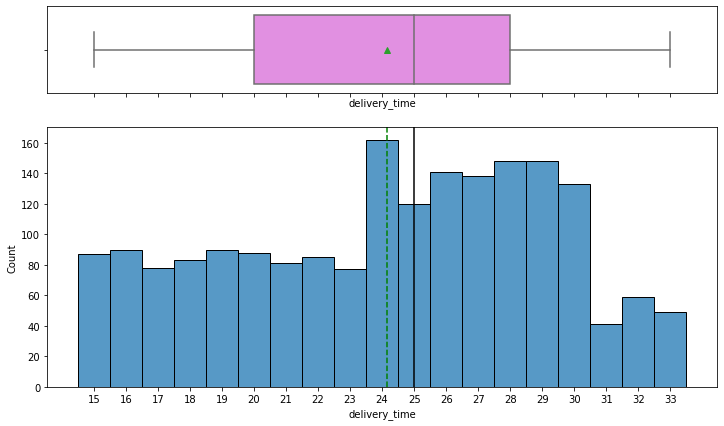

In [20]:
histogram_boxplot(df, 'delivery_time', binrange=[14.5,33.5], binwidth=1)
plt.xticks(np.arange(min(df.delivery_time), max(df.delivery_time)+1, 1));

#### Observations:
* The delivery time ranges from 15 minutes to 33 minutes.
* The median delivery time is 25 minutes.
* There are no outliers in the delivery time distribution.
* The delivery time distribution is left skewed.

#### Observations on numerical ratings  - ratings of 'Not given' have been omitted for numerical treatment

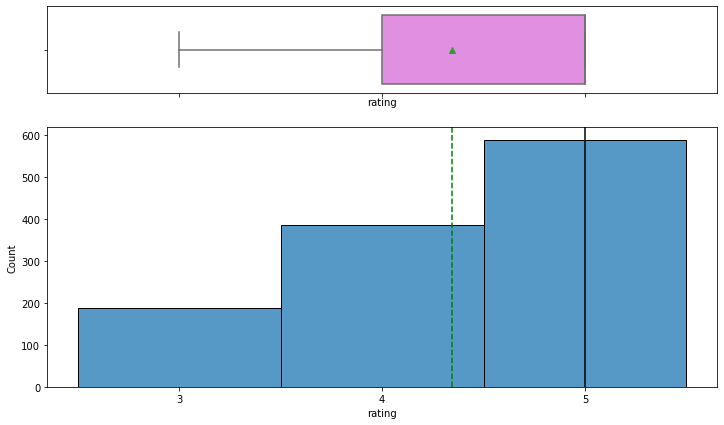

In [21]:
histogram_boxplot(df_rated, 'rating', binrange=[2.5,5.5], binwidth=1)
plt.xticks(np.arange(min(df_rated.rating), max(df_rated.rating)+1, 1));

#### Observations
* Of the orders that are rated, the median rating is 5
* The mode is 5
* The mean is 4.34
* The rating distribution is left skewed

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
# num_orders contains the number of orders associated with each unique restaurant name
# diplay the first five rows in num_orders
num_orders = df.restaurant_name.value_counts()
num_orders.iloc[0:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Top 5 in terms of orders received
1. Shake Shack (219)
2. The Meatball Shop (132)
3. Blue Ribbon Sushi (119)
4. Blue Ribbon Fried Chicken (96)
5. Parm (68)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:
# reslt_df contains the rows from df where the condition: day_of_the_week equals 'Weekend' is true
# display the first five rows of a column in rslt_df that displays the number of orders associated 
# with each unique restaurant name
rslt_df = df[df['day_of_the_week'] == 'Weekend']
rslt_df.cuisine_type.value_counts().iloc[0:5]

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
American is the most popular cuisine on the weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
# divide the number cost_of_the_order entries greater than 20 
# by the total number of cost_or_the_order entries
len(df[df['cost_of_the_order'] > 20])/len(df['cost_of_the_order'])*100

29.24130663856691

#### Observations:
29.24% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
# mean of the delivery_time values
df.delivery_time.mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
## determine the number of times each customer id is present 
num_orders = df['customer_id'].value_counts(ascending=False)

## show the first five
num_orders.head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:
1. The most frequent customer (id = 52832), placed 13 orders.
2. The 2nd most frequent customer (id = 47440), placed 10 orders.
3. The 3rd most frequent customer (id = 83287), placed 9 orders.
4. The 4th most frequent customer (id = 250494), placed 8 orders.
5. The 5th most frequent customer (id = 259341), placed 7 orders.

#### Observations about customer spending

In [28]:
df.groupby('customer_id')['cost_of_the_order'].sum().describe()

count    1200.000000
mean       26.095683
std        20.796383
min         4.750000
25%        12.660000
50%        20.695000
75%        31.430000
max       225.800000
Name: cost_of_the_order, dtype: float64

#### Observations
* There are 1200 unique customers
* The average total amount spent on orders per customer is \\$26.10
* The median amount spent on orders per customer is \\$20.70
* The maximum amount spent on orders by a single customer is \\$225.80

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Bivariate Scatter Plots - observations on cost_of_the_order, food_preparation_time, and delivery_time

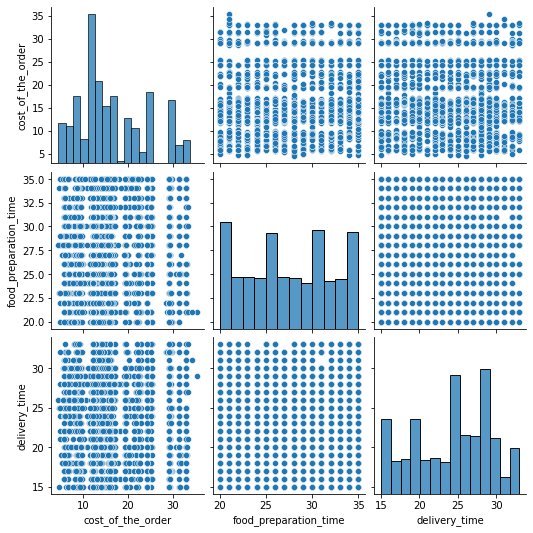

In [27]:
#Pairplot of numeric colums: 'cost_of_the_order', 'food_preparation_time', and 'delivery_time'
sns.pairplot(df[['cost_of_the_order','food_preparation_time','delivery_time']]);

#### Observations:
* There appears to be no correlation between cost_of_the_order, food_preparation_time, and delivery_time. As a further step, a heat map is shown below with correlation coefficients.
* As a further check, a correlation heat map is shown below.

#### Correlation cost_of_the_order, food_preparation_time, and delivery_time

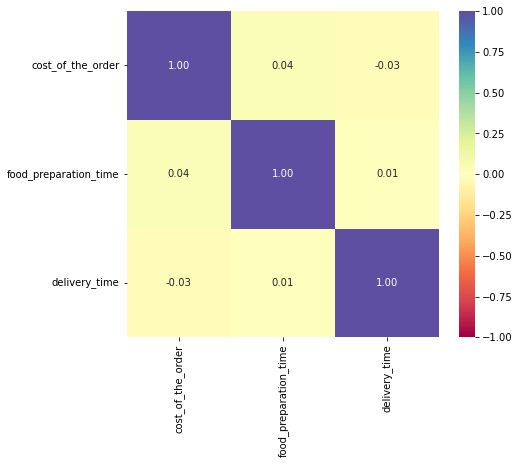

In [28]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order','food_preparation_time','delivery_time']

corr = df[num_var].corr()

# plot the heatmap
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.gcf().set_size_inches(7, 6);
plt.show()

#### Observations:
There appears to be no correlation between cost_of_the_order, delivery_time, and food_preparation_time.

#### Correlation including numerical rating - omitting rows with rating 'Not given' for the purpose of numerical treatment

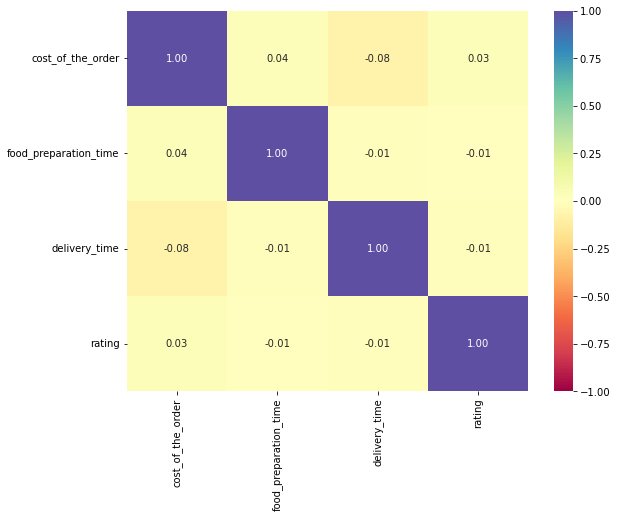

In [29]:
num_var = ['cost_of_the_order','food_preparation_time','delivery_time','rating']

corr = df_rated[num_var].corr()

# plot the heatmap
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.gcf().set_size_inches(9, 7);
plt.show()

#### Observations:
There appears to be no correlation between cost of the order, delivery time, food preparation time, and rating.

#### Observation of ratings by day of the week


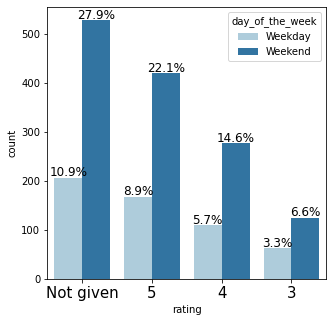

In [30]:
labeled_barplot(df, 'rating', hue='day_of_the_week', perc=True, r=0);

#### Observations
* Weekends and Weekdays both have the highest proportion of orders with ratings Not given, followed by 5, then 4, then 3.

#### Money spent on orders by customer group

,customer_group,money_spent
0,First Time,12949.26
1,Repeat,18365.56


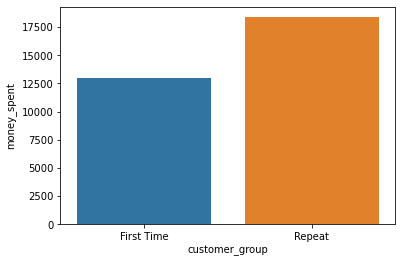

In [31]:
# create a column with total money spend on orders by customer
customer_spending = df.groupby('customer_id')['cost_of_the_order'].sum()

# merge customer_df with customer_spending
df_merge_customer = customer_df.merge(customer_spending, 
                                      on = 'customer_id', how = 'inner')

# create a column with total money spent on orders by customer group
customer_group_spending = df_merge_customer.groupby('customer_group')['cost_of_the_order'].sum().reset_index(name='money_spent')

customer_group_spending
sns.barplot(x='customer_group', y='money_spent', data=customer_group_spending);
customer_group_spending

#### Observations: 
* More money is spent on orders by repeat customers than by first time customers.
* First time customers spent a total of \\$12,949.26 on orders.
* Repeat customers spent a total of \\$18,365.56 on orders.

#### Cost of the order by cuisine type

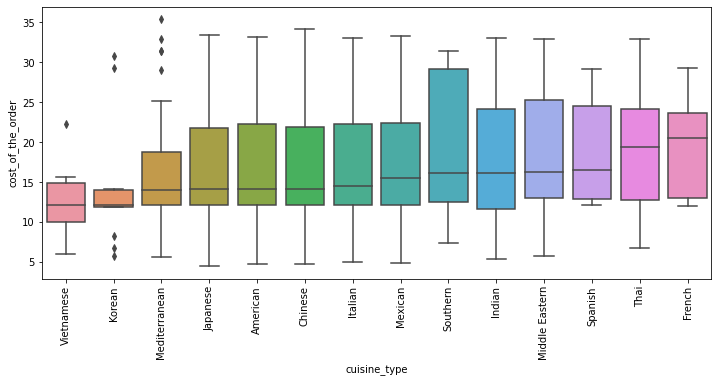

In [32]:
cuisine = df.groupby('cuisine_type')
sns.boxplot(x="cuisine_type", y='cost_of_the_order', data=df, order = cuisine.cost_of_the_order.median().sort_values().index);
plt.gcf().set_size_inches(12, 5);
plt.xticks(rotation=90);

#### Observations:
* Several of the cuisine types have similar minimum costs of the order (\\$5 - \\$7)
* Spanish and French have the highest minimum cost of the order (near \\$12 dollars).
* French has the highest median cost per order (near \\$21), followed by Thai (near \\$19).
* Vietnemese and Korean have the lowest median cost of order (near \\$12).
* The cuisine types with the lowest median cost of the order have the most cost of the order outliers (Mediterranean, Korean, and Vietnemese)

#### Observations on food preparation time by cuisine type

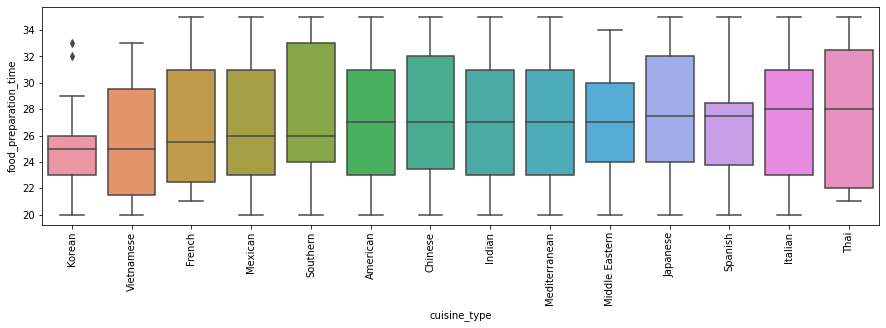

In [33]:
sns.boxplot(x="cuisine_type", y='food_preparation_time',
            data=df, order = cuisine.food_preparation_time.median().sort_values().index);
plt.gcf().set_size_inches(15, 4)
plt.xticks(rotation=90);

#### Observations
* the median food preparation time is similar across all cuisine types (about 25-27 minutes)
* the minimum food preparation time is about 20 minutes for most cuisine types, but slightly greater for French and Thai cuisines.
* The maximum food preparation time is about 35 minutes for most cuisines, but slightly less for Korean, Vietnamese, and Middle Eastern.
* Korean is the only cuisine type with ouliers in the food preparation time distribution.


#### Observations of cost of the order by day of the week

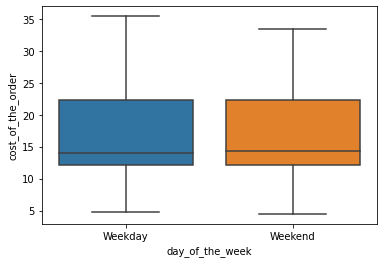

In [34]:
sns.boxplot(x="day_of_the_week", y='cost_of_the_order', data=df);

#### Observations:
* The weekday cost of the order distribution is very similar to the weekend cost of the order distribution. 
* Slight differences are: median price is slighly higher on the weekend, and the maximum price is higher on the weekday. 

#### Observations of food preparation time by day of the week

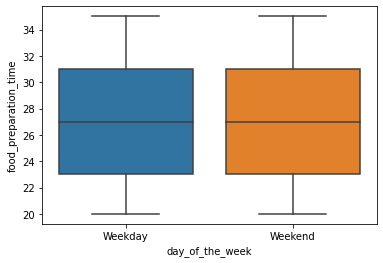

In [35]:
sns.boxplot(x="day_of_the_week", y='food_preparation_time', data=df);

### Observations
* The food preparation time distributions are similar on the weekdays and the weekends
* Both have symmetric distributions with 
    * a mean food preparation time of about 27 minutes, 
    * a min of 20 minutes, and a 
    * max of 35 minutes

#### Observations of food delivery time by day of the week

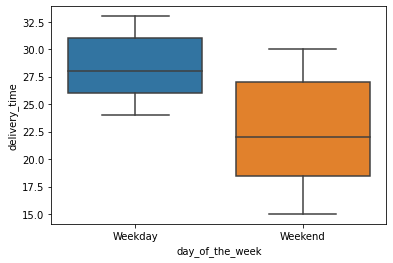

In [36]:
sns.boxplot(x="day_of_the_week", y='delivery_time', data=df);

#### Observations:
* The food delivery time distribution shows longer min, median, and max delivery times on the weekdays compared to the weekends. 
* The range of delivery times is greater on the weekends.

#### Observation of total order time by rating

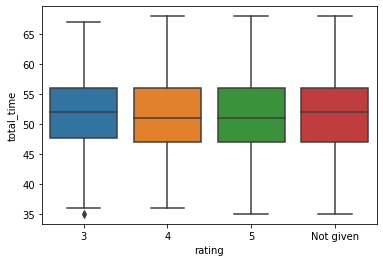

In [37]:
# create a new total_time column that is the sum of food preparation time and delivery time
df['total_time']=df['food_preparation_time'] + df['delivery_time']

sns.boxplot(x="rating", y='total_time', order=['3','4','5','Not given'], data=df);

#### Observations:
* The total time distribution is similar for ratings of 3, 4, 5 and not given.

#### Observations of numerical rating by cuisine type and total order time

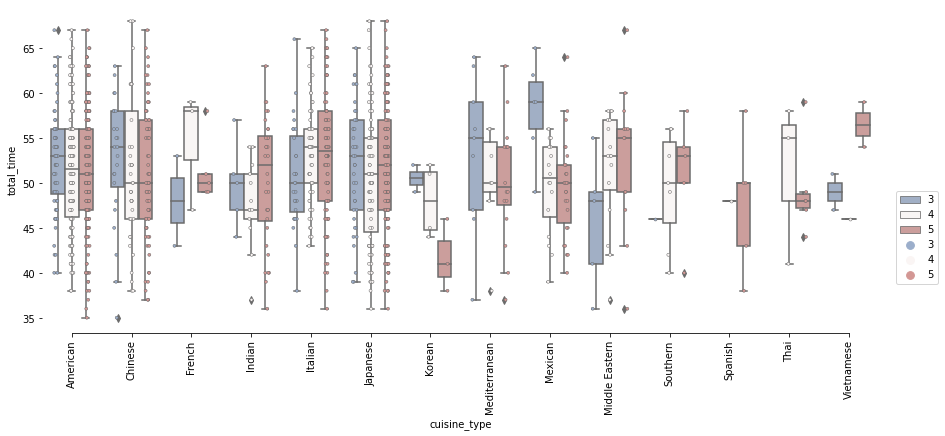

In [38]:
# in the dataframe that contains a column with numerical ratings, create a new total_time column 
# that is the sum of food preparation time and delivery time
df_rated['total_time']=df_rated['food_preparation_time'] + df_rated['delivery_time']

# Plot the cuisine type, rating, and total time
sns.boxplot(x="cuisine_type", y="total_time", hue="rating", data=df_rated,
           width=0.7, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="cuisine_type", y="total_time",hue="rating", data=df_rated,
              size=3, color=".3", linewidth=0.5, palette="vlag", dodge=True)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0)
plt.gcf().set_size_inches(15, 6)
plt.xticks(rotation=90);

#### Observations
* The rating of 3 corresponds with longer median order times for American, Chinese, Korean, Mediterranean, and Mexican cuisines.
* The rating of 5 corresponds with faster median order times for American, Korean, Mediterranean, Mexican, and Thai cuisines.

To explore this further, correlation heatmaps are broken down by cuisine type and shown below.

#### Observations of correlations between total time, delivery_time, food_preparation_time, cost_of_the_order, and rating by cuisine type

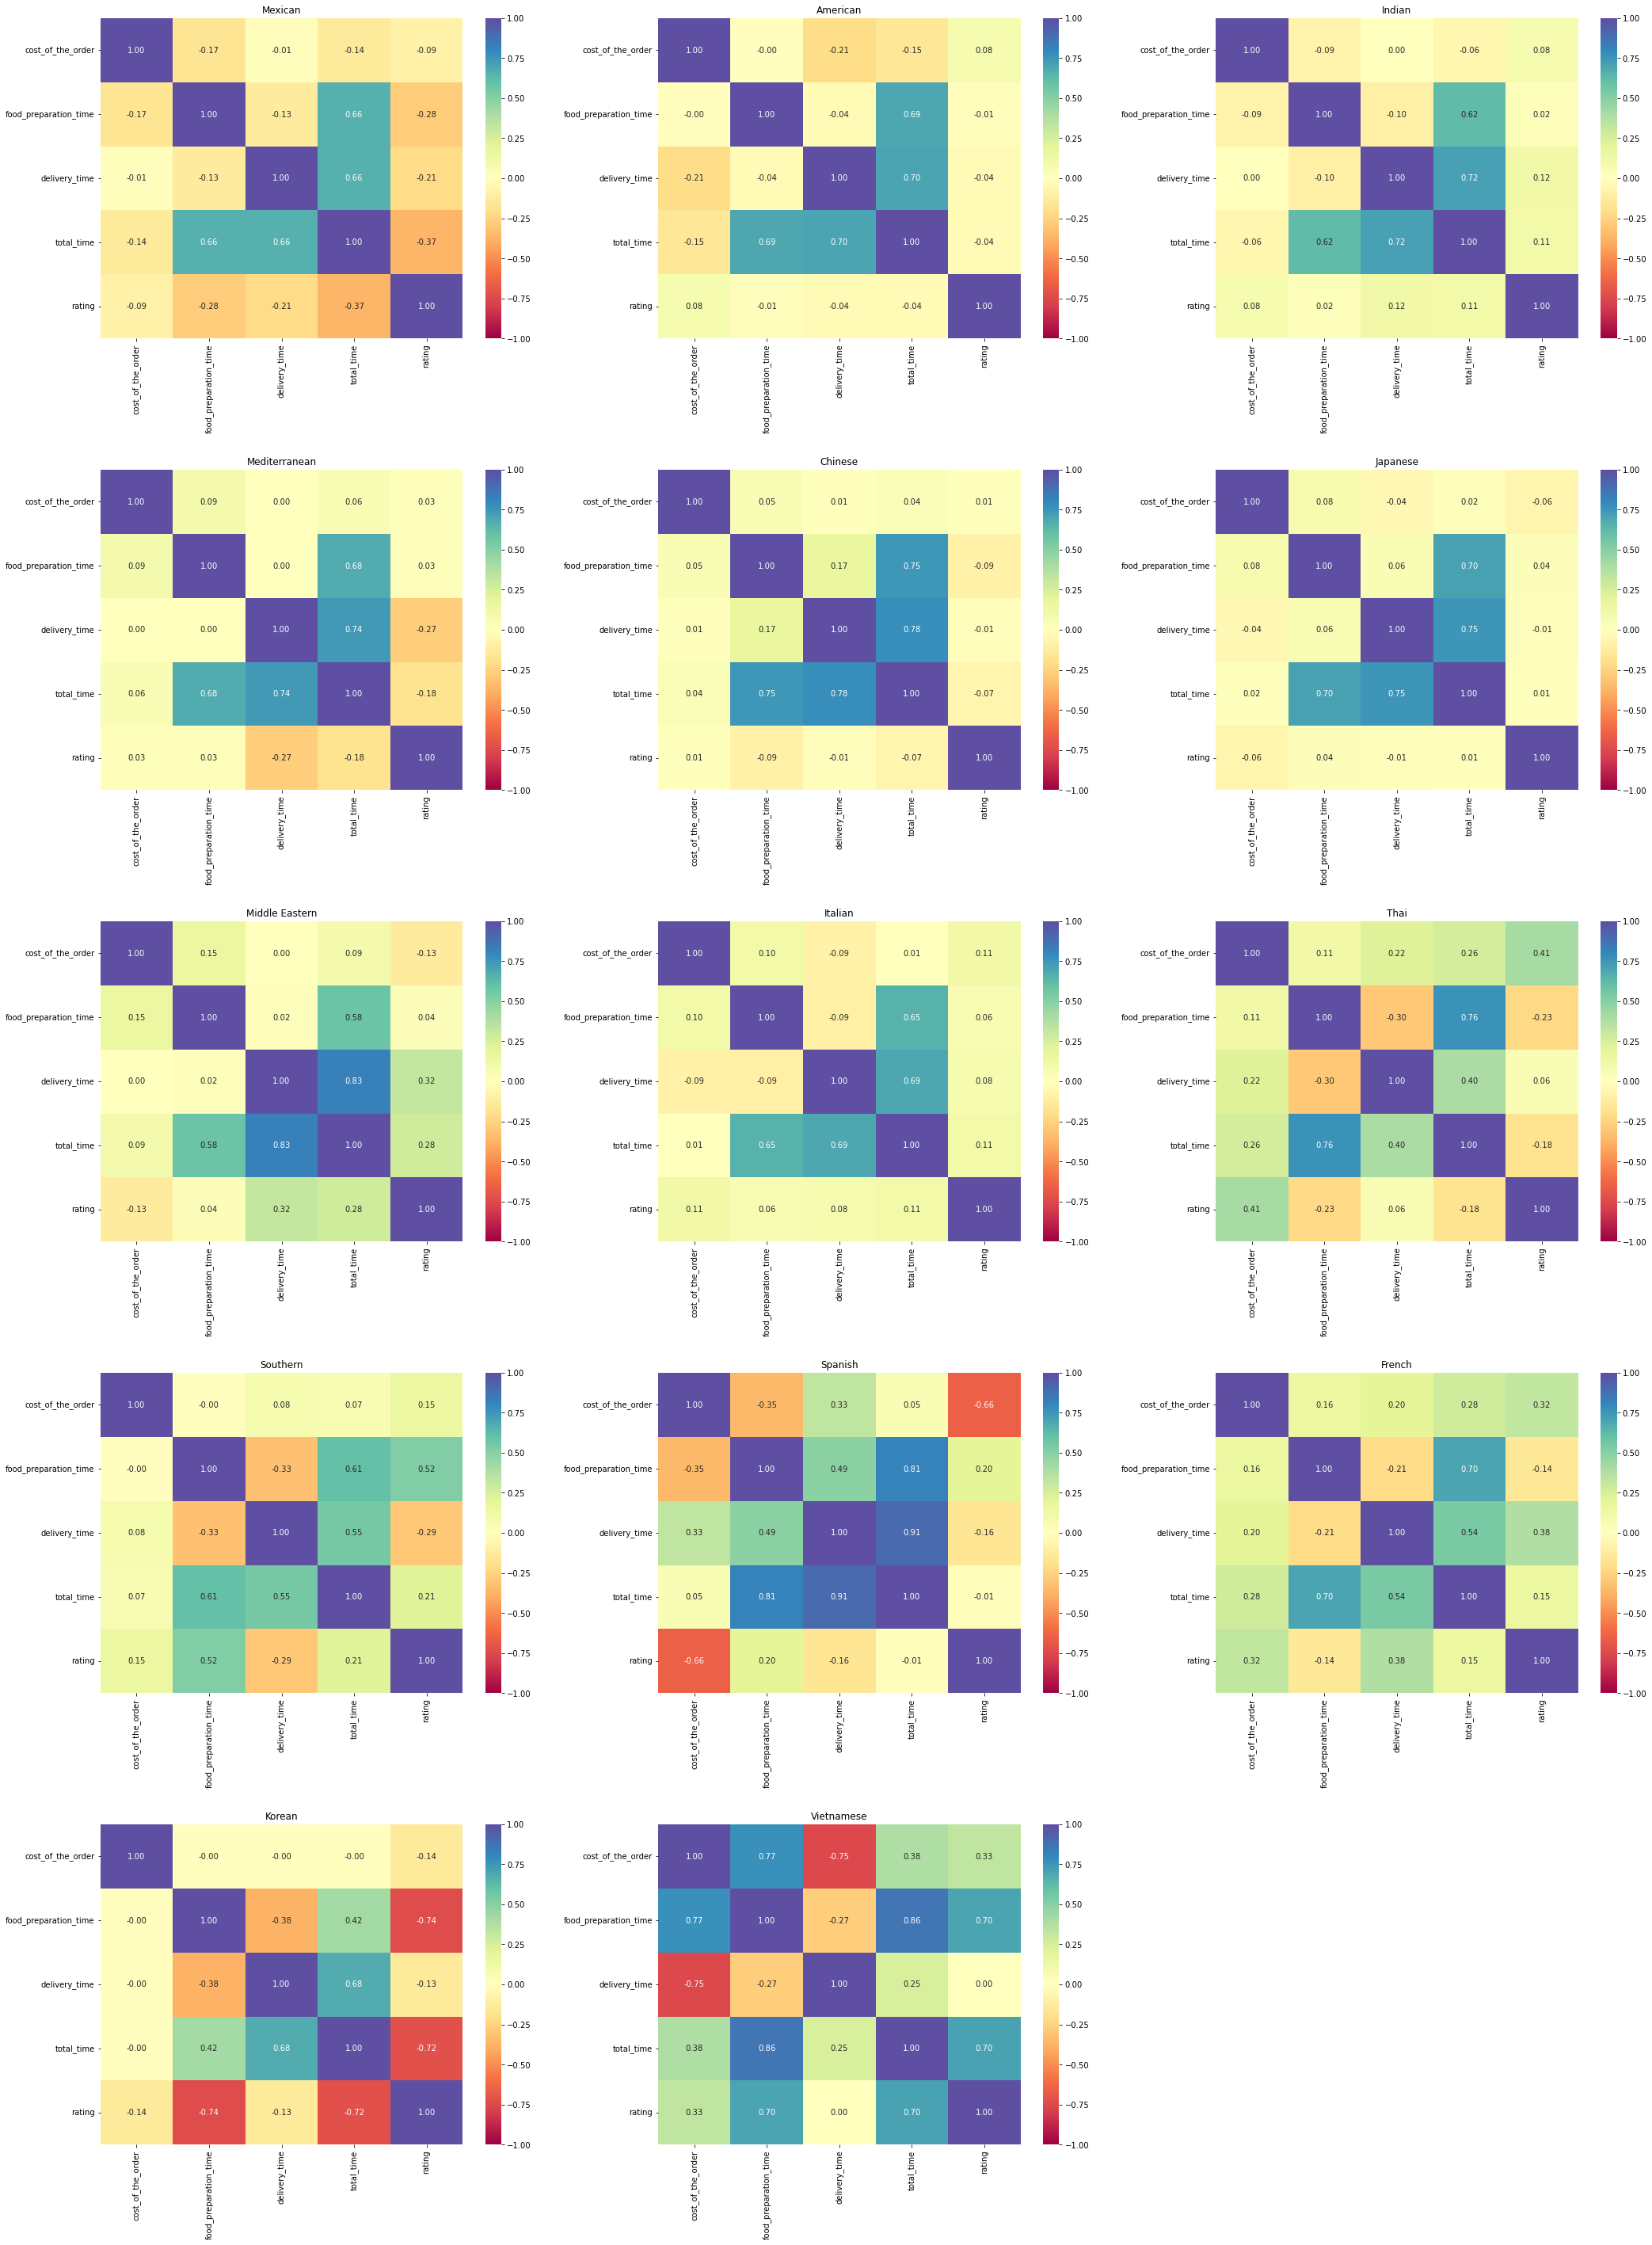

In [39]:
#Note: In the heatmaps below, all data with 'Not rated' have been omitted in order to treat rating numerically.
def correlation(data, series):
    fig = plt.figure(figsize = (30,40)) 
    num = 1
    # create a heatmap for each unique value in the column passed in
    for name in data[series].unique():
        # columns to use in correlation heatmap
        num_var = ['cost_of_the_order','food_preparation_time','delivery_time','total_time','rating']
        namef = data[(data[series]==name)]
        corr = namef[num_var].corr()
        axcount = fig.add_subplot(5, 3, num)
        axcount.title.set_text(name)
        sns.heatmap(corr, ax=axcount, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", 
                    xticklabels=corr.columns, yticklabels=corr.columns)
        num += 1
    fig.tight_layout(pad=3.0)
    plt.show()
        
correlation(df_rated,'cuisine_type')

#### Observations:
* In general, there is high correlation between 
    * food_preparation_time and total_time and
    * delivery_time and total_time 
* Korean cuisine 
    * has a negative correlation between food_preparation_time and rating and
    * total_time and rating 
* Spanish cuisine 
    * has a negative correlation between cost_of_the_order and rating
* Vietnemese cuisine 
    * has a positive correlation between total_time and rating
    * has a negative correlation between delivery_time and cost_of_the_order
* Korean, Spanish, and Vietnemese cuisine types show the most correlations in general, but these cuisine types are also the three cuisine types with the smallest sample sizes.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [40]:
#Eliminate the orders where the ratings are not given 
#Note: the commented out code below was used above
# df_rated = df[df['rating']!='Not given']


#Group the remaining rated orders by restaurant name, and order them by the number of times they have been rated
rated_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

#Keep the retaurants that have at least 50 ratings
rated_count50 = rated_count[rated_count['rating']>50] 

#Rename series
rated_count50['rating_count']=rated_count50['rating']
rated_count50 = rated_count50.drop('rating', axis = 1)


# convert the "object" rating column to a "numeric" rating column
#Note: the commented out code below was used above
#df_rated.rating = df_rated.rating.astype('int32')

# Group by restaurant_name and order them by mean rating
mean_rated = df_rated.groupby(['restaurant_name']).rating.mean().sort_values(ascending=False).reset_index()

#Keep the retaurants that have at a mean rating of at least 4
high_ratedgt4 = mean_rated[mean_rated['rating']>4]

#Rename series
high_ratedgt4['mean_rating']=high_ratedgt4['rating']
high_ratedgt4 = high_ratedgt4.drop('rating', axis = 1)

#Merge the restaurants that have at least 50 ratings with the restaurants that have ratings >4, use inner merge
df_merge = rated_count50.merge(high_ratedgt4, on = 'restaurant_name', how = 'inner')
df_merge.head()

,restaurant_name,rating_count,mean_rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
The restaurants that qualify for the promotional offer are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [41]:
## func revenue loops through the values in a column. For values where the condition cost_of_the_order>20 is true, 
## the revenue is 25% the cost of the order, for values where the condition condition 
## cost_of_the_order>5 (but less than 20) is true, the revenue is 15% of the order, if neither
## condition is met, the revenue is 0.

def revenue(col1):
    counter = 0
    col2 = [0]*(len(col1))
    for i in col1:
        if i > 20:
            col2[counter] = i*0.25
        elif i >5:
            col2[counter] = i*0.15
        else :
            col2[counter] = 0
        counter += 1      
    return col2
              
df['revenue']=revenue(df['cost_of_the_order'])
df['revenue'].sum()

6166.303

#### Observations:
The net revenue generated by the company across all orders is \\$6166.30

#### Observation of revenue by customer type

,customer_group,revenue
0,First Time,2546.935
1,Repeat,3619.368


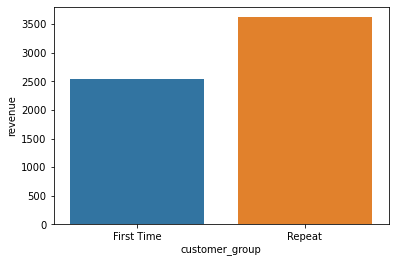

In [42]:
# total revenue from each customer_id
customer_revenue = df.groupby('customer_id')['revenue'].sum()

# merge customer_df with customer_revenue by customer_id
df_merge_customer_rev = customer_df.merge(customer_revenue, 
                                      on = 'customer_id', how = 'inner')

#determine total revenue for each customer_group
customer_group_rev = df_merge_customer_rev.groupby('customer_group')['revenue'].sum().reset_index(name='revenue')

sns.barplot(x='customer_group', y='revenue', data=customer_group_rev);
customer_group_rev

#### Observations:
More revenue is made from repeat customers than first time customers.

#### Observations of revenue per order by cuisine type

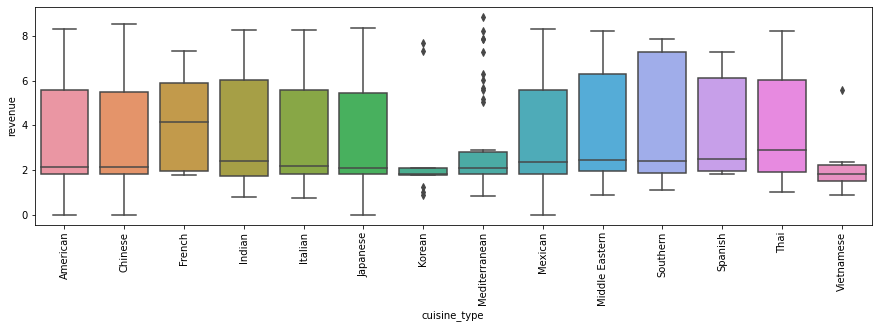

In [43]:
sns.boxplot(x="cuisine_type", y='revenue', 
            data=df); 
plt.gcf().set_size_inches(15, 4)
plt.xticks(rotation=90);

#### Observations
* The median revenue per order is the greatest for French Cuisine and smallest for Vietnemese cuisine.
* The revenue per order distribution is right skewed for most cuisine types.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [44]:
#Note: the commented out below code was used above
# create a column for total time
#df['total_time']=df['food_preparation_time'] + df['delivery_time']

# display the time columns in a dataframe
dftot_time = df[['delivery_time','food_preparation_time','total_time']]
dftot_time.head()

,delivery_time,food_preparation_time,total_time
0,20,25,45
1,23,25,48
2,28,23,51
3,15,25,40
4,24,25,49


In [45]:
# divide the number of entries greater than 60 min by the total entries
len(df[df['total_time'] > 60])/len(df['total_time'])*100

10.537407797681771

#### Observations:
   10.54% of the orders take more than 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

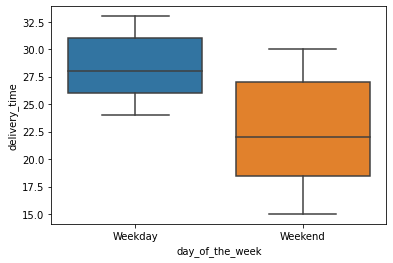

In [46]:
sns.boxplot(x="day_of_the_week", y='delivery_time', data=df);

In [47]:
## mean delivery time on the weekends
print(df[df['day_of_the_week'] =='Weekend'].delivery_time.mean())

## mean delivery time on the weekdays
print(df[df['day_of_the_week'] !='Weekend'].delivery_time.mean())

22.4700222057735
28.340036563071298


#### Observations:
* The mean delivery time on the weekend is 22.47 minutes
* The mean delivery weekdays it is 28.34 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

#### Conclusions:
* Orders are not distributed evenly across restaurants. Of the 178 restaurants, the top 5 restaurants get 1/3 of the total orders.
* Orders are not distributed evely across cuisine type. Of the 14 cuisine types, over half of the total orders are of 2 cuisine types (American and Japanese).
* As a whole, ratings are not correlated to total order times, or cost of the order. But when broken down by cuisine type, certain cuisine types show correlation between order times and cost of the order 
    * The median ratings from American, Mexican, Chinese, Mediterranean, Korean, and Thai cuisines all go down when total order time increases. Some other cuisine types have ratings that are less sensitive to the order time.
    * High correlations present between variables in some cuisine types may be related to small sample sizes of those cuisine types.
* There are more first time customers than returning customers.
* More revenue is generated by returning customers than first time customers.
* The weekdays have longer delivery times than weekends.

#### Recommendations:
* During traffic hours when food_delivery time is slow, or times when food_preparation_time is long, time sensitive promotions could be made for restaurants associated with cuisines that display no correlation between rating and total time. 
* The weekdays have longer delivery times than weekends. To help speed up average weekday delivery times, time sensitive promotions could be made during hours that don't have heavy traffic.
* The median revenue per order is greatest with French cuisine, so perhaps promotional offers could be made for French restaurants to gain more orders at the current French restaurants and new French restaurants with similar price structures.
* More revenue is generated from repeat customers, so perhaps promotional incentives could be made to first time customers after they have made their first order to keep them coming back.